import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import joblib
import matplotlib.pyplot as plt

# 2050까지의 데이터 들고오기 
co2_2050 = pd.read_csv('../result/2030/co2_2030.csv')
CH4_2050 = pd.read_csv('../result/2030/CH4_2030.csv')
NO_2050 = pd.read_csv('../result/2030/NO_2030.csv')


# 미래 독립변수 예측할 부분만 남기기
co2_2050 = co2_2050.loc[co2_2050.Year >= 2020, :]
co2_2050.reset_index(drop=True, inplace=True)
CH4_2050 = CH4_2050.loc[CH4_2050.Year >= 2020, :]
CH4_2050.reset_index(drop=True, inplace=True)
NO_2050 = NO_2050.loc[NO_2050.Year >= 2020, :]
NO_2050.reset_index(drop=True, inplace=True)

# 미래 독립변수 병합하기
data_2050 = pd.merge(co2_2050, NO_2050, on='Year')
data_2050 = pd.merge(data_2050, CH4_2050, on='Year')

# 학습 시킬 데이터 x_future_data, x_future_data_poly로 만들기
x_future_data = data_2050[[  'CH4', 'NO', 'CO2']]
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_future_data_poly = poly_features.fit_transform(x_future_data)


# 학습시킨 결과 load해서 예측하기
temperature_learning = joblib.load('temperature_learning')
result_temperature_2050 = list(temperature_learning.predict(x_future_data_poly))
data_2050['temperature'] = result_temperature_2050
ice_mass_learning = joblib.load('ice_mass_learning')
result_ice_mass_2050 = list(ice_mass_learning.predict(x_future_data))
data_2050['ice_mass'] = result_ice_mass_2050

for i in range(len(data_2050)):
    if i % 10 == 1:
        data_2050.loc[i, 'temperature'] = data_2050.loc[i, 'temperature'] - 0.005
    elif i % 10 == 2:
        data_2050.loc[i, 'temperature'] = data_2050.loc[i, 'temperature'] - 0.004
    elif i% 10 == 3:
        data_2050.loc[i, 'temperature'] = data_2050.loc[i, 'temperature'] + 0.006
    elif i% 10 == 4:
        data_2050.loc[i, 'temperature'] = data_2050.loc[i, 'temperature'] - 0.003
    elif i% 10 == 5:
        data_2050.loc[i, 'temperature'] = data_2050.loc[i, 'temperature'] + 0.002
    elif i% 10 == 6:
        data_2050.loc[i, 'temperature'] = data_2050.loc[i, 'temperature'] + 0.004
    elif i% 10 == 7:
        data_2050.loc[i, 'temperature'] = data_2050.loc[i, 'temperature'] - 0.003
    elif i% 10 == 8:
        data_2050.loc[i, 'temperature'] = data_2050.loc[i, 'temperature'] - 0.005
    elif i% 10 == 9:
        data_2050.loc[i, 'temperature'] = data_2050.loc[i, 'temperature'] - 0.007
    else:
        data_2050.loc[i, 'temperature'] = data_2050.loc[i, 'temperature'] + 0.002
        
for i in range(len(data_2050)):
    if i % 10 == 1:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 1500
    elif i% 10 == 2:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 3000
    elif i% 10 == 3:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 2000
    elif i% 10 == 4:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 1000
    elif i% 10 == 5:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 1500
    elif i% 10 == 6:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 2000
    elif i% 10 == 7:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 3000
    elif i% 10 == 8:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 1500
    elif i % 10 == 9:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 800
    else:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 1000
print(list(data_2050.loc[:, "temperature"]))
result = list(data_2050.loc[:, 'ice_mass'])

In [1]:
# 이산화탄소 줄인 데이터 학습하기
new_x = [[8.536440e+09 , 3.124815e+09, 3.179837e+10 - (48000000 * 365)]]
print(ice_mass_learning.predict(new_x) + 1000 - result[0])

NameError: name 'ice_mass_learning' is not defined

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import joblib

# 2020_2030 데이터 들고오기
data_2030 = pd.read_csv('2020_2030_data.csv')
# 마이페이지 or 결과창 케이스
case = int(input())
# 이산화 탄소 양
number = int(input())

if case == 1:
    for i in range(len(data_2030)):
        data_2030.loc[i, 'CO2'] = data_2030.loc[i, 'CO2'] - number
else:
    for i in range(len(data_2030)):
        data_2030.loc[i, 'CO2'] = data_2030.loc[i, 'CO2'] - number * 30


# 학습 시킬 데이터 x_future_data, x_future_data_poly로 만들기
x_future_data = data_2030[['CO2', 'NO', 'CH4']]

poly_features = PolynomialFeatures(degree=2)
x_future_data_poly = poly_features.fit_transform(x_future_data)


# 학습시킨 결과 load해서 예측하기
temperature_learning = joblib.load('temperature_learning')
print(temperature_learning)
result_temperature_2030 = list(temperature_learning.predict(x_future_data_poly))
data_2030['temperature_predict'] = result_temperature_2030

# 빙하는 온도를 바탕으로 판단
x_future_data = data_2030[['temperature_predict']]
ice_mass_learning = joblib.load('ice_mass_learning')
result_ice_mass_2030 = list(ice_mass_learning.predict(x_future_data))
data_2030['ice_mass_predict'] = result_ice_mass_2030

for i in range(len(data_2030)):
    if i % 10 == 1:
#         data_2030.loc[i, 'Temperature'] = data_2030.loc[i, 'Temperature'] - 0.005
        data_2030.loc[i, 'temperature_predict'] = data_2030.loc[i, 'temperature_predict'] - 0.005
    elif i % 10 == 2:
#         data_2030.loc[i, 'Temperature'] = data_2030.loc[i, 'Temperature'] - 0.004
        data_2030.loc[i, 'temperature_predict'] = data_2030.loc[i, 'temperature_predict'] - 0.004
    elif i% 10 == 3:
#         data_2030.loc[i, 'Temperature'] = data_2030.loc[i, 'Temperature'] + 0.006
        data_2030.loc[i, 'temperature_predict'] = data_2030.loc[i, 'temperature_predict'] + 0.006
    elif i% 10 == 4:
#         data_2030.loc[i, 'Temperature'] = data_2030.loc[i, 'Temperature'] - 0.003
        data_2030.loc[i, 'temperature_predict'] = data_2030.loc[i, 'temperature_predict'] - 0.003
    elif i% 10 == 5:
#         data_2030.loc[i, 'Temperature'] = data_2030.loc[i, 'Temperature'] + 0.002
        data_2030.loc[i, 'temperature_predict'] = data_2030.loc[i, 'temperature_predict'] + 0.002
    elif i% 10 == 6:
#         data_2030.loc[i, 'Temperature'] = data_2030.loc[i, 'Temperature'] + 0.004
        data_2030.loc[i, 'temperature_predict'] = data_2030.loc[i, 'temperature_predict'] + 0.004
    elif i% 10 == 7:
#         data_2030.loc[i, 'Temperature'] = data_2030.loc[i, 'Temperature'] - 0.003
        data_2030.loc[i, 'temperature_predict'] = data_2030.loc[i, 'temperature_predict'] - 0.003
    elif i% 10 == 8:
#         data_2030.loc[i, 'Temperature'] = data_2030.loc[i, 'Temperature'] - 0.005
        data_2030.loc[i, 'temperature_predict'] = data_2030.loc[i, 'temperature_predict'] - 0.005
    elif i% 10 == 9:
#         data_2030.loc[i, 'Temperature'] = data_2030.loc[i, 'Temperature'] - 0.007
        data_2030.loc[i, 'temperature_predict'] = data_2030.loc[i, 'temperature_predict'] - 0.007
    else:
#         data_2030.loc[i, 'Temperature'] = data_2030.loc[i, 'Temperature'] + 0.002
        data_2030.loc[i, 'temperature_predict'] = data_2030.loc[i, 'temperature_predict'] + 0.002
        
for i in range(len(data_2030)):
    if i % 10 == 1:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] - 1500
        data_2030.loc[i, 'ice_mass_predict'] = data_2030.loc[i, 'ice_mass_predict'] - 375
    elif i% 10 == 2:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] + 3000
        data_2030.loc[i, 'ice_mass_predict'] = data_2030.loc[i, 'ice_mass_predict'] + 750
    elif i% 10 == 3:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] - 2000
        data_2030.loc[i, 'ice_mass_predict'] = data_2030.loc[i, 'ice_mass_predict'] - 500
    elif i% 10 == 4:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] + 1000
        data_2030.loc[i, 'ice_mass_predict'] = data_2030.loc[i, 'ice_mass_predict'] + 250
    elif i% 10 == 5:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] + 1500
        data_2030.loc[i, 'ice_mass_predict'] = data_2030.loc[i, 'ice_mass_predict'] + 375
    elif i% 10 == 6:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] - 2000
        data_2030.loc[i, 'ice_mass_predict'] = data_2030.loc[i, 'ice_mass_predict'] - 500
    elif i% 10 == 7:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] - 3000
        data_2030.loc[i, 'ice_mass_predict'] = data_2030.loc[i, 'ice_mass_predict'] - 750
    elif i% 10 == 8:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] + 1500
        data_2030.loc[i, 'ice_mass_predict'] = data_2030.loc[i, 'ice_mass_predict'] + 375
    elif i % 10 == 9:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] - 800
        data_2030.loc[i, 'ice_mass_predict'] = data_2030.loc[i, 'ice_mass_predict'] - 200
    else:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] + 1000
        data_2030.loc[i, 'ice_mass_predict'] = data_2030.loc[i, 'ice_mass_predict'] + 250
print(data_2030)


# # 2030년도 지구온도 감소 차이, 이산화 탄소, 빙하무게
answer_dict = {}

answer_dict['temperature_2030'] = round((data_2030.loc[10, 'Temperature'] - data_2030.loc[10, 'temperature_predict']),5)
answer_dict['ice_2030'] = round((data_2030.loc[10, 'ice_mass'] - data_2030.loc[10, 'ice_mass_predict'])/-data_2030.loc[10, 'ice_mass'],5) * 100
if case == 1:
    answer_dict['co2_2030'] = round((number)/data_2030.loc[10, 'CO2'],5) * 100
    answer_dict['temperature'] = list(data_2030.loc[:, 'Temperature'])
    answer_dict['temperature_predict'] = list(data_2030.loc[:, 'temperature_predict'])
else:
    answer_dict['co2_2030'] = round((number * 30)/data_2030.loc[10, 'CO2'],5) * 100
    answer_dict['ice_mass'] = list(data_2030.loc[:, 'ice_mass'])
    answer_dict['ice_mass_predict'] = list(data_2030.loc[:, 'ice_mass_predict'])
print(answer_dict)

1
165000000
LinearRegression()
      Year           CO2            NO           CH4  Temperature  \
0   2020.0  3.163337e+10  3.124815e+09  8.536440e+09     0.898894   
1   2021.0  3.200106e+10  3.152652e+09  8.598050e+09     0.920940   
2   2022.0  3.237071e+10  3.180490e+09  8.659659e+09     0.951577   
3   2023.0  3.274234e+10  3.208328e+09  8.721268e+09     0.991804   
4   2024.0  3.311593e+10  3.236165e+09  8.782878e+09     1.013618   
5   2025.0  3.349149e+10  3.264003e+09  8.844487e+09     1.050015   
6   2026.0  3.386902e+10  3.291841e+09  8.906097e+09     1.083994   
7   2027.0  3.424852e+10  3.319678e+09  8.967706e+09     1.109550   
8   2028.0  3.462998e+10  3.347516e+09  9.029315e+09     1.140681   
9   2029.0  3.501341e+10  3.375354e+09  9.090925e+09     1.172382   
10  2030.0  3.539882e+10  3.403192e+09  9.152534e+09     1.215651   

        ice_mass  temperature_predict  ice_mass_predict  
0  -25330.427732             0.890785     -24726.048228  
1  -28120.170221        

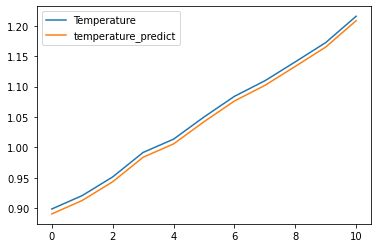

In [3]:
temperature_data = data_2030.loc[:, ['Temperature', 'temperature_predict']]
temperature_data.plot()
plt.show()

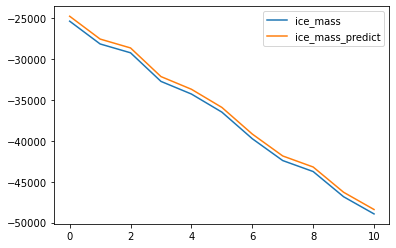

In [4]:
ice_data = data_2030.loc[:, ['ice_mass', 'ice_mass_predict']]
ice_data.plot()
plt.show()